# first approximation check of ML algo

In [189]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [190]:
import pandas as pd
import sys, os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#get the directory of the data
pwd = os.path.dirname(os.getcwd())
df = pd.read_csv(pwd +  "/InputData/dataframe/aux.csv")
df =df.drop(['trackNum','catIdx'],1)



In [191]:
y = df['aux'].values
lifetime = df['lifetime']
df = df.drop(['aux'], axis=1)
col_names = df.columns
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df = pd.DataFrame(features, columns = col_names)
# df['lifetime'] = lifetime
X  = df
assert len(y) == len(X)

## Training

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train_temp = X_train
N,D = X_train.shape


In [225]:
N,D = X_train.shape

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20)

Epoch 1/20
172/172 [==============================] - 1s 2ms/step - loss: 1.0732 - accuracy: 0.3912 - val_loss: 0.8589 - val_accuracy: 0.4707
Epoch 2/20
172/172 [==============================] - 1s 4ms/step - loss: 0.8025 - accuracy: 0.5074 - val_loss: 0.6562 - val_accuracy: 0.6244
Epoch 3/20
172/172 [==============================] - 1s 6ms/step - loss: 0.6188 - accuracy: 0.6775 - val_loss: 0.5288 - val_accuracy: 0.8130
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.8299 - val_loss: 0.4452 - val_accuracy: 0.9054
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.9136 - val_loss: 0.3859 - val_accuracy: 0.9355
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.9246 - val_loss: 0.3421 - val_accuracy: 0.9470
Epoch 7/20
172/172 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.9364 - val_loss: 0.3084 - val_accuracy: 0.9513
Epoch 

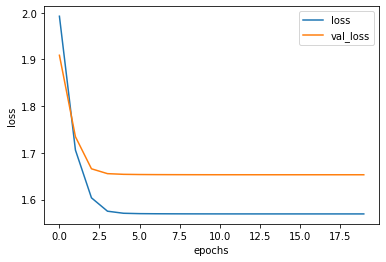

In [222]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

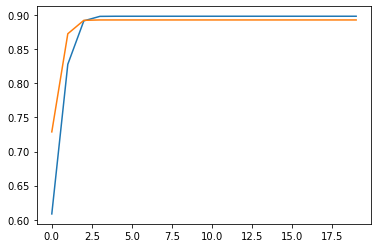

In [223]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')

## Predicting

In [224]:
model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 1ms/step - loss: 1.6530 - accuracy: 0.8928


[1.653022289276123, 0.892837643623352]

## Save Model

In [178]:
model.save("linearclassifier.h5")

## Load model

In [180]:
model = tf.keras.models.load_model('linearclassifier.h5')
model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9530


[0.1403442621231079, 0.9529797434806824]

## Neural Network, 2 hidden layers, 10 nodes

In [233]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(10,activation='tanh'),
    tf.keras.layers.Dense(10,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10)


Epoch 1/10
172/172 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.6393 - val_loss: 0.2960 - val_accuracy: 0.9431
Epoch 2/10
172/172 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9390 - val_loss: 0.1387 - val_accuracy: 0.9623
Epoch 3/10
172/172 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9550 - val_loss: 0.1238 - val_accuracy: 0.9595
Epoch 4/10
172/172 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9474 - val_loss: 0.1205 - val_accuracy: 0.9590
Epoch 5/10
172/172 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9473 - val_loss: 0.1175 - val_accuracy: 0.9612
Epoch 6/10
172/172 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9497 - val_loss: 0.1160 - val_accuracy: 0.9617
Epoch 7/10
172/172 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9488 - val_loss: 0.1176 - val_accuracy: 0.9606
Epoch 

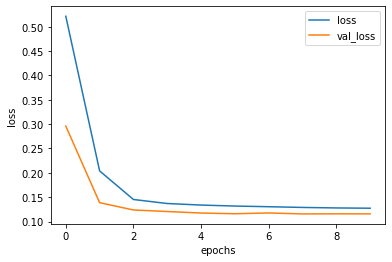

In [234]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

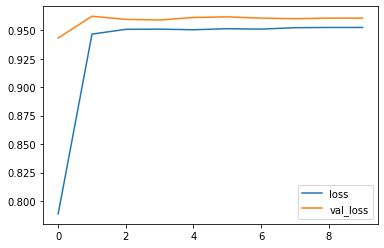

In [235]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend()
